<a href="https://colab.research.google.com/github/Garehmalika/Prediction-of-Protection-Stops-for-a-Cobot/blob/main/Prediction_of_Protection_Stops_for_a_Cobot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploration et prétraitement des données**

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', None)


In [47]:
# Remplace le nom par celui que tu utilises réellement
df = pd.read_excel('/content/data.xlsx')

# Affichage des 5 premières lignes
display(df.head())


,Num,Timestamp,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,Current_J4,Temperature_J4,Current_J5,Temperature_J5,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
0,1,2022-10-26T08:17:21.847Z,0.109628,27.875,-2.024669,29.3750,-1.531442,29.3750,-0.998570,32.1250,-0.062540,32.2500,-0.152622,32.0000,2.955651e-01,-0.000490,0.001310,-0.132836,-0.007479,-0.152962,0.082732,1,0.0,False
1,2,2022-10-26T08:17:22.852Z,0.595605,27.875,-2.278456,29.3125,-0.866556,29.4375,-0.206097,32.1875,-1.062762,32.2500,-0.260764,32.0000,-7.391485e-30,-0.000304,0.002185,0.001668,-0.000767,0.000417,0.505895,1,0.0,False
2,3,2022-10-26T08:17:23.857Z,-0.229474,27.875,-2.800408,29.3125,-2.304336,29.4375,-0.351499,32.1250,-0.668869,32.3125,0.039071,32.0625,1.369386e-01,0.007795,-2.535874,0.379867,0.000455,-0.496856,0.079420,1,0.0,False
3,4,2022-10-26T08:17:24.863Z,0.065053,27.875,-3.687768,29.3125,-1.217652,29.4375,-1.209115,32.1250,-0.819755,32.2500,0.153903,32.0000,-9.030032e-02,-0.004911,-0.009096,-0.384196,0.018411,0.425559,0.083325,1,0.0,False
4,5,2022-10-26T08:17:25.877Z,0.884140,27.875,-2.938830,29.3750,-1.794076,29.4375,-2.356471,32.1875,-0.966427,32.3125,0.178998,32.0000,1.268088e-01,0.005567,0.001138,-0.353284,0.014994,0.180989,0.086379,1,0.0,False


In [48]:
print(f"Nombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")

# Info générale
df_info = pd.DataFrame({
    "Colonnes": df.columns,
    "Type": df.dtypes,
    "Valeurs manquantes": df.isnull().sum(),
    "% manquantes": (df.isnull().mean() * 100).round(2)
})
display(df_info)


Nombre de lignes : 7409
Nombre de colonnes : 24


,Colonnes,Type,Valeurs manquantes,% manquantes
Num,Num,int64,0,0.00
Timestamp,Timestamp,object,0,0.00
Current_J0,Current_J0,float64,46,0.62
Temperature_T0,Temperature_T0,float64,54,0.73
Current_J1,Current_J1,float64,54,0.73
Temperature_J1,Temperature_J1,float64,54,0.73
Current_J2,Current_J2,float64,54,0.73
Temperature_J2,Temperature_J2,float64,54,0.73
Current_J3,Current_J3,float64,54,0.73
Temperature_J3,Temperature_J3,float64,54,0.73


In [49]:
# Imputation des colonnes numériques par la moyenne
for col in df.columns:
    if df[col].dtype in ['float64', 'int64'] and df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)


<ipython-input-49-f62fc8acd8f9>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [50]:
# Vérifions qu'il n'y a plus de valeurs manquantes
display(df.isnull().sum().to_frame("Valeurs Manquantes Totales"))

# Doublons
print(f"Doublons : {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)


,Valeurs Manquantes Totales
Num,0
Timestamp,0
Current_J0,0
Temperature_T0,0
Current_J1,0
Temperature_J1,0
Current_J2,0
Temperature_J2,0
Current_J3,0
Temperature_J3,0


Doublons : 0


In [51]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')


In [52]:
df.to_csv("/content/UR3_clean_ready.csv", index=False)
print(" Données nettoyées et sauvegardées.")


 Données nettoyées et sauvegardées.


In [53]:
from IPython.display import display

# Affichage des statistiques descriptives
display(df.describe().T)


,count,mean,std,min,25%,50%,75%,max
Num,7409.0,3705.000000,2138.938405,1.000000,1853.000000,3705.000000,5557.000000,7409.000000
Current_J0,7409.0,-0.048934,0.826816,-6.247756,-0.193958,-0.079556,0.094239,6.806938
Temperature_T0,7409.0,34.906781,2.751972,27.812500,33.000000,36.500000,37.062500,37.250000
Current_J1,7409.0,-2.297936,0.797527,-5.808734,-2.661886,-2.241549,-1.781414,1.083596
Temperature_J1,7409.0,37.659636,3.235458,29.312500,35.375000,39.687500,40.125000,40.500000
Current_J2,7409.0,-1.199381,0.607757,-4.171966,-1.549657,-1.080292,-0.839890,2.464940
Temperature_J2,7409.0,38.064064,3.299855,29.375000,35.812500,40.187500,40.437500,40.937500
Current_J3,7409.0,-0.605312,0.513057,-3.333102,-0.827201,-0.573241,-0.390375,2.270268
Temperature_J3,7409.0,40.936999,3.170779,32.125000,38.937500,43.062500,43.125000,43.437500
Current_J4,7409.0,-0.022968,0.628486,-4.738406,-0.124975,-0.013624,0.084990,4.089389


**Identification des valeurs aberrantes**

 Valeurs aberrantes détectées AVANT traitement :
Colonne : Num | Nombre d'outliers : 0
Colonne : Current_J0 | Nombre d'outliers : 978
Colonne : Temperature_T0 | Nombre d'outliers : 0
Colonne : Current_J1 | Nombre d'outliers : 424
Colonne : Temperature_J1 | Nombre d'outliers : 0
Colonne : Current_J2 | Nombre d'outliers : 323
Colonne : Temperature_J2 | Nombre d'outliers : 0
Colonne : Current_J3 | Nombre d'outliers : 591
Colonne : Temperature_J3 | Nombre d'outliers : 104
Colonne : Current_J4 | Nombre d'outliers : 1317
Colonne : Temperature_J4 | Nombre d'outliers : 139
Colonne : Current_J5 | Nombre d'outliers : 34
Colonne : Temperature_J5 | Nombre d'outliers : 22
Colonne : Speed_J0 | Nombre d'outliers : 3247
Colonne : Speed_J1 | Nombre d'outliers : 2989
Colonne : Speed_J2 | Nombre d'outliers : 2727
Colonne : Speed_J3 | Nombre d'outliers : 3466
Colonne : Speed_J4 | Nombre d'outliers : 3166
Colonne : Speed_J5 | Nombre d'outliers : 3198
Colonne : Tool_current | Nombre d'outliers : 1097
Colonn

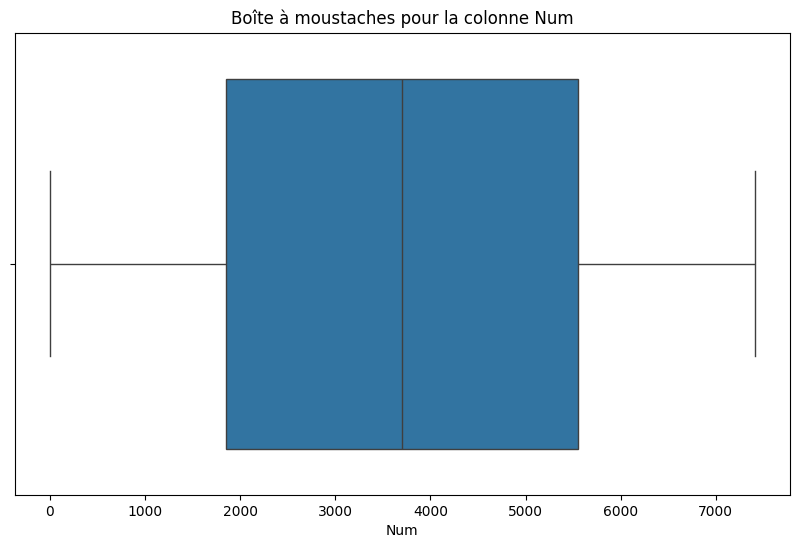

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que 'data' est le sous-dataframe contenant uniquement les colonnes numériques
data = df.select_dtypes(include=['float64', 'int64']).copy()

# Fonction de détection des outliers selon l'IQR
def detect_outliers_iqr(dataframe):
    outliers = {}
    for col in dataframe.columns:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = dataframe[(dataframe[col] < lower_bound) | (dataframe[col] > upper_bound)]
    return outliers

# Détection des valeurs aberrantes avant traitement
outliers_before = detect_outliers_iqr(data)

# Affichage du nombre de valeurs aberrantes par colonne
print(" Valeurs aberrantes détectées AVANT traitement :")
for col, outlier_df in outliers_before.items():
    print(f"Colonne : {col} | Nombre d'outliers : {len(outlier_df)}")

# Exemple de visualisation avec une boîte à moustaches pour une variable
col_to_plot = data.columns[0]  # Remplace par la colonne que tu veux visualiser
plt.figure(figsize=(10, 6))
sns.boxplot(x=data[col_to_plot])
plt.title(f'Boîte à moustaches pour la colonne {col_to_plot}')
plt.show()

In [55]:
# Remplacer les valeurs anormales par la valeur la plus fréquente (mode)
mode_value = df['Robot_ProtectiveStop'].mode()[0]  # Récupérer la valeur la plus fréquente (mode)
df['Robot_ProtectiveStop'] = df['Robot_ProtectiveStop'].apply(lambda x: mode_value if x not in [0, 1] else x)


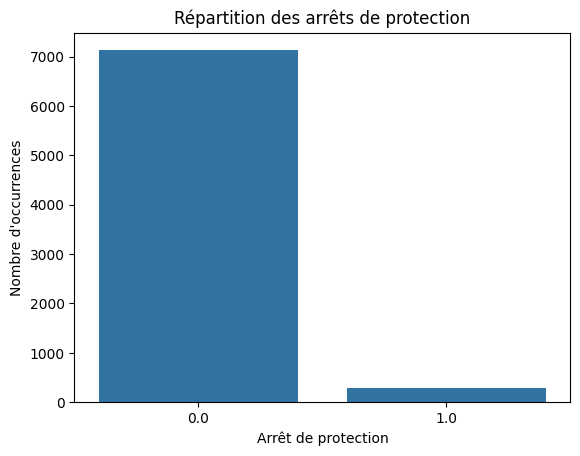

,proportion
Robot_ProtectiveStop,
0.0,96.247807
1.0,3.752193


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remplacer les NaN dans la cible si nécessaire (par exemple par 0 si on suppose qu'absence = pas d'arrêt)
df['Robot_ProtectiveStop'] = df['Robot_ProtectiveStop'].fillna(0)

# Distribution des valeurs de la cible
sns.countplot(x='Robot_ProtectiveStop', data=df)
plt.title("Répartition des arrêts de protection")
plt.xlabel("Arrêt de protection")
plt.ylabel("Nombre d'occurrences")
plt.show()

# Afficher aussi les proportions
display(df['Robot_ProtectiveStop'].value_counts(normalize=True) * 100)


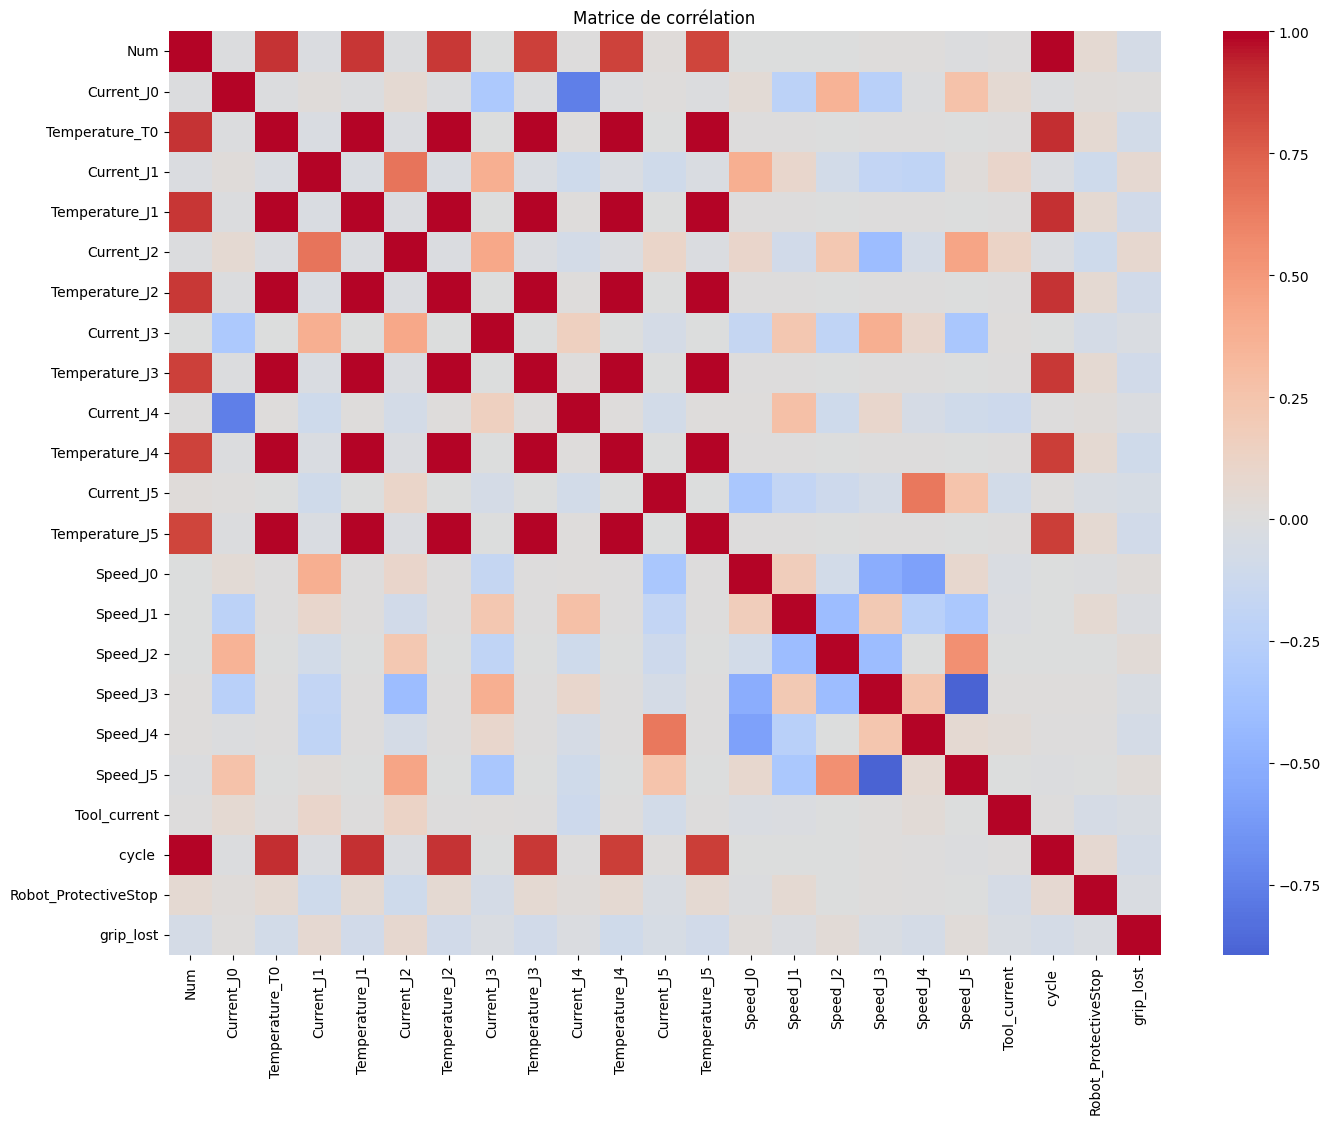

In [ ]:
# Calcul de la matrice de corrélation
correlation_matrix = df.corr(numeric_only=True)

# Affichage de la heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Matrice de corrélation")
plt.show()


In [ ]:
#  afficher les 10 variables les plus corrélées avec Robot_ProtectiveStop
target_corr = correlation_matrix["Robot_ProtectiveStop"].drop("Robot_ProtectiveStop")
display(target_corr.abs().sort_values(ascending=False).head(10))


,Robot_ProtectiveStop
Current_J2,0.108846
Current_J1,0.108593
Current_J3,0.066130
cycle,0.061066
Temperature_T0,0.058712
Num,0.058608
Temperature_J1,0.058518
Temperature_J2,0.057929
Temperature_J4,0.056071
Temperature_J3,0.056048


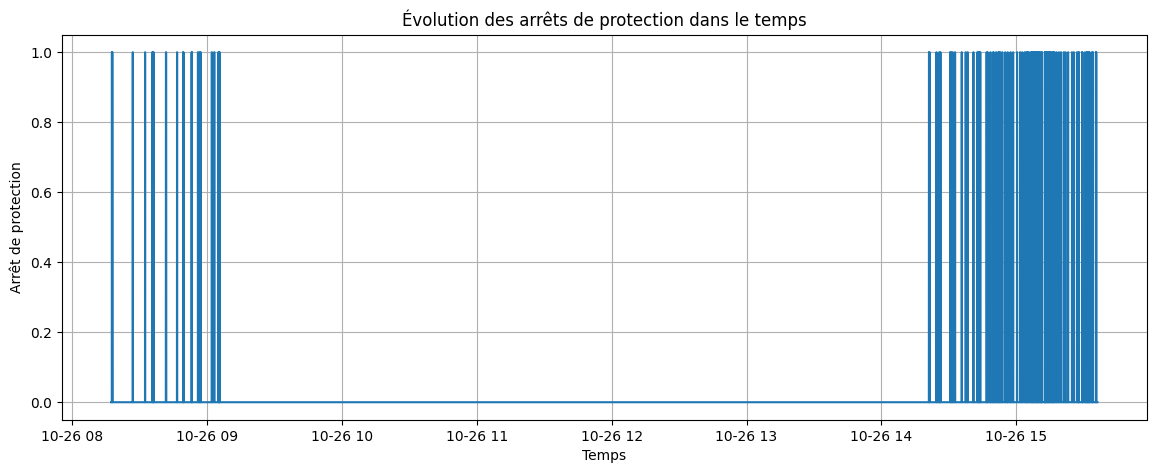

In [ ]:
#  voir les arrêts au fil du temps
plt.figure(figsize=(14, 5))
plt.plot(df['Timestamp'], df['Robot_ProtectiveStop'])
plt.title("Évolution des arrêts de protection dans le temps")
plt.xlabel("Temps")
plt.ylabel("Arrêt de protection")
plt.grid(True)
plt.show()


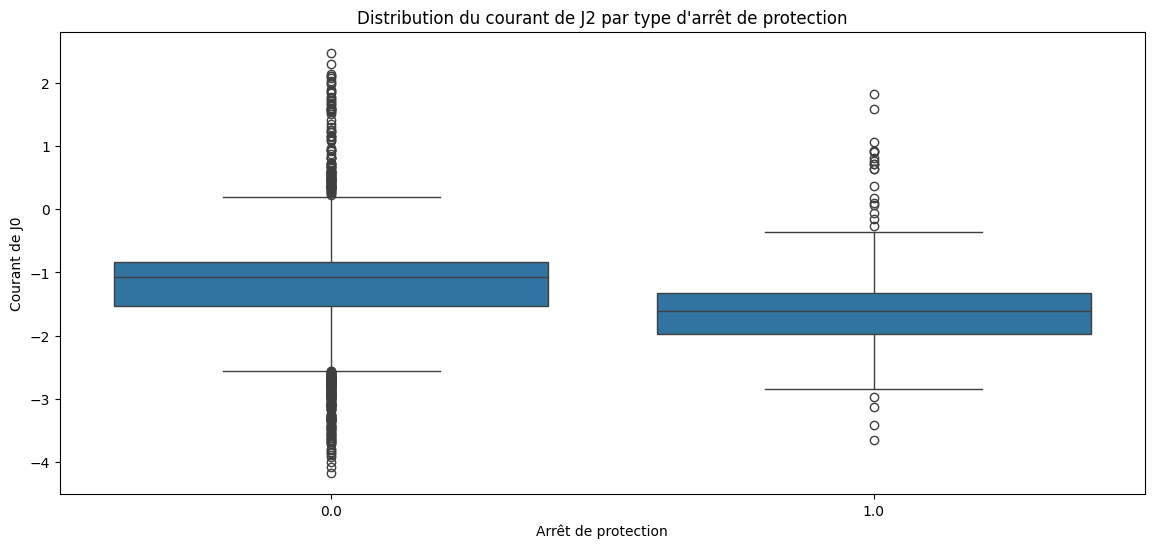

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Robot_ProtectiveStop', y='Current_J2', data=df)
plt.title("Distribution du courant de J2 par type d'arrêt de protection")
plt.xlabel("Arrêt de protection")
plt.ylabel("Courant de J2")
plt.show()


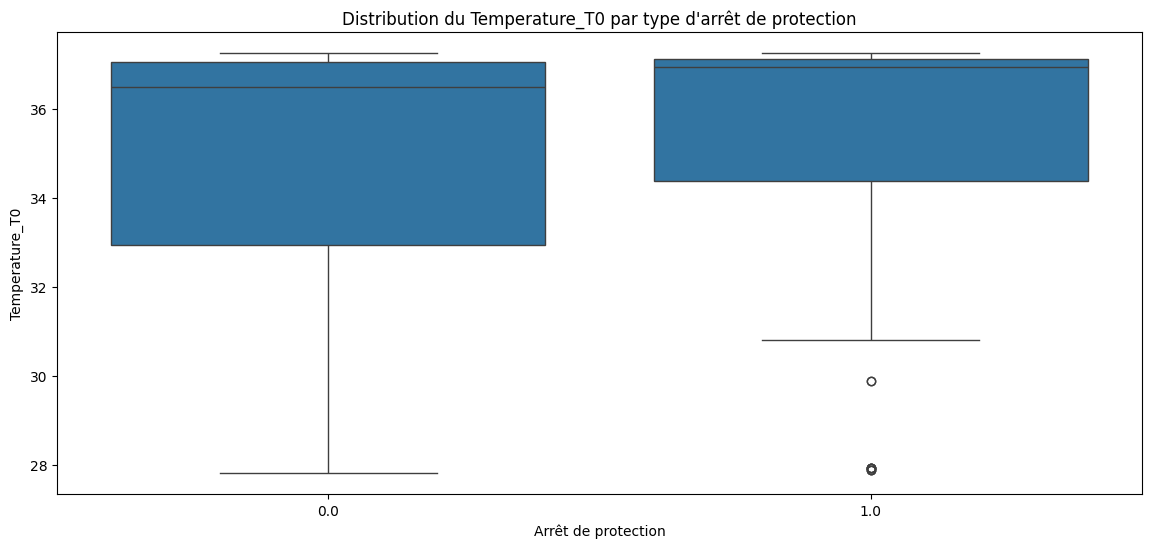

In [ ]:
plt.figure(figsize=(14, 6))

sns.boxplot(x='Robot_ProtectiveStop', y='Temperature_T0', data=df)
plt.title("Distribution du Temperature_T0 par type d'arrêt de protection")
plt.xlabel("Arrêt de protection")
plt.ylabel("Temperature_T0")
plt.show()

** Normalisation**

In [57]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

X = df.drop(columns=['Robot_ProtectiveStop'])
y = df['Robot_ProtectiveStop']


datetime_cols = X.select_dtypes(include=['datetime64[ns, UTC]']).columns
for col in datetime_cols:

    X[col] = X[col].dt.tz_localize(None).astype(np.int64) // 10**9

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)




In [44]:
import pickle

# Sauvegarder l'objet scaler dans un fichier .pkl
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# **les Modeles**


Modèle LSTM

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Diviser les données en ensembles d’entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Taille de la séquence
sequence_length = 10

# Ajuster la taille pour être compatible avec sequence_length
n_samples = X_train.shape[0]
n_features = X_train.shape[1]
new_n_samples = (n_samples // sequence_length) * sequence_length
X_train = X_train[:new_n_samples]
X_train = X_train.reshape((-1, sequence_length, n_features))

# Réappliquer la même logique à X_test
n_samples_test = X_test.shape[0]
new_n_samples_test = (n_samples_test // sequence_length) * sequence_length
X_test = X_test[:new_n_samples_test]
X_test = X_test.reshape((-1, sequence_length, n_features))

print("Shape de X_train après reshape:", X_train.shape)
print("Shape de X_test après reshape:", X_test.shape)


Shape de X_train après reshape: (592, 10, 23)
Shape de X_test après reshape: (148, 10, 23)


**Création du modèle LSTM**

In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


# Créer le générateur pour l'entraînement
train_generator = TimeseriesGenerator(X_scaled, y, length=10, batch_size=32)

# Créer le générateur pour le test
test_generator = TimeseriesGenerator(X_scaled, y, length=10, batch_size=32)

# Définir un modèle simple LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(10, X_scaled.shape[1])))
model.add(Dense(1, activation='sigmoid'))  # Utiliser sigmoid pour classification binaire

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(train_generator, epochs=10, validation_data=test_generator)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


232/232 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9427 - loss: 0.3775 - val_accuracy: 0.9624 - val_loss: 0.1553
Epoch 2/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9568 - loss: 0.1684 - val_accuracy: 0.9624 - val_loss: 0.1339
Epoch 3/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9596 - loss: 0.1459 - val_accuracy: 0.9627 - val_loss: 0.1313
Epoch 4/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9651 - loss: 0.1184 - val_accuracy: 0.9626 - val_loss: 0.1168
Epoch 5/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9581 - loss: 0.1315 - val_accuracy: 0.9631 - val_loss: 0.1093
Epoch 6/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9686 - loss: 0.0997 - val_accuracy: 0.9639 - val_loss: 0.1039
Epoch 7/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9599 - loss: 0.1191 - val_accuracy: 0.9649 - val_loss: 0.0981
Epoch 8/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9672 - loss: 0.0893 - val_accuracy: 0.965

**evaluation**

232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Valeurs uniques dans y_pred_classes: [0 1]
Valeurs uniques dans y_true: [0. 1.]


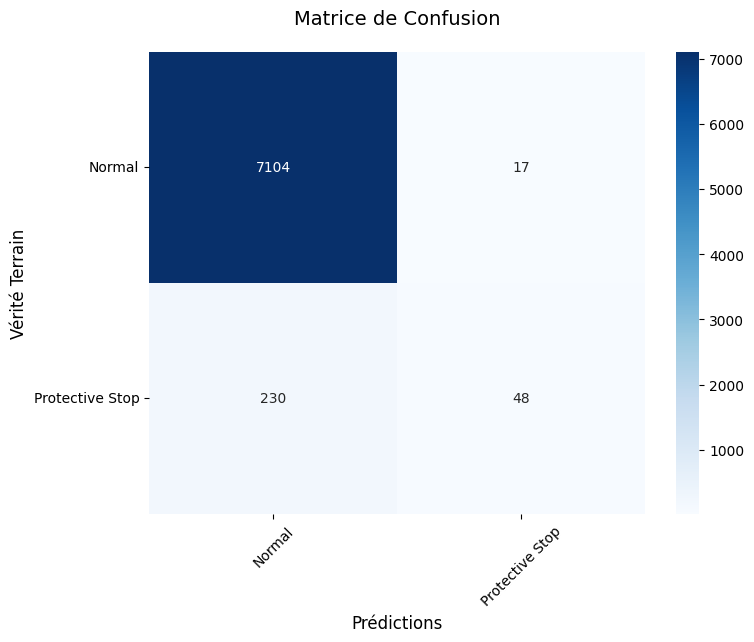

Accuracy: 0.966617110420327
Recall: 0.17266187050359713
F1-Score: 0.27988338192419826

Rapport de classification :
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      7121
           1       0.74      0.17      0.28       278

    accuracy                           0.97      7399
   macro avg       0.85      0.59      0.63      7399
weighted avg       0.96      0.97      0.96      7399



In [15]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, f1_score

y_pred = model.predict(test_generator)

y_pred_classes = (y_pred > 0.5).astype(int)

print("Valeurs uniques dans y_pred_classes:", np.unique(y_pred_classes))

y_true = []
for i in range(len(test_generator)):
    _, y_batch = test_generator[i]
    y_true.extend(y_batch)

y_true = np.array(y_true)

print("Valeurs uniques dans y_true:", np.unique(y_true))
y_true = (y_true > 0.5).astype(int)

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualisation graphique
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Normal', 'Protective Stop'],
            yticklabels=['Normal', 'Protective Stop'])

plt.title('Matrice de Confusion', fontsize=14, pad=20)
plt.xlabel('Prédictions', fontsize=12)
plt.ylabel('Vérité Terrain', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Calculer l'accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy: {accuracy}")

# Calculer le recall
recall = recall_score(y_true, y_pred_classes)
print(f"Recall: {recall}")

# Calculer le F1-score
f1 = f1_score(y_true, y_pred_classes)
print(f"F1-Score: {f1}")
print("\nRapport de classification :\n", classification_report(y_true, y_pred_classes))


**Archivage avec WandB**

In [21]:
# Installer WandB et Joblib si nécessaire
!pip install wandb
!pip install joblib

In [27]:
# Imports nécessaires
import wandb
from wandb.integration.keras import WandbMetricsLogger
from joblib import dump
import tensorflow as tf
from sklearn.metrics import classification_report

# 1. Connexion à W&B (Tu devras t'authentifier une seule fois)
wandb.login()

# 2. Initialiser un projet W&B
wandb.init(project="robot_protect", name="LSTM_final_run", reinit=True)

# 3. Calculer et archiver le rapport de classification
# Assure-toi que y_true et y_pred_classes sont définis
report = classification_report(y_true, y_pred_classes, output_dict=True)

# 4. Configuration à logguer (ajustable selon tes besoins)
config = {
    "model_type": "LSTM",
    "sequence_length": 10,
    "batch_size": 32,
    "activation": "relu",
    "output_activation": "sigmoid",
    "optimizer": "adam",
    "loss": "binary_crossentropy",
    "epochs": 10
}
wandb.config.update(config)

# 5. Log des métriques de classification
wandb.log({
    "accuracy": accuracy,
    "recall": recall,
    "f1_score": f1,
    "precision_class_0": report["0"]["precision"],
    "recall_class_0": report["0"]["recall"],
    "f1_class_0": report["0"]["f1-score"],
    "precision_class_1": report["1"]["precision"],
    "recall_class_1": report["1"]["recall"],
    "f1_class_1": report["1"]["f1-score"]
})

# 6. Sauvegarder le modèle sous forme .pkl
model_filename = "lstm_model.pkl"
model_data = {
    'model': model,
    'input_shape': (10, X_scaled.shape[1])
}
dump(model_data, model_filename)

# 7. Archiver le modèle dans W&B sous forme d'artifact
artifact = wandb.Artifact("lstm_model", type="model")
artifact.add_file(model_filename)
wandb.log_artifact(artifact)


try:
    wandb.finish()
except AttributeError:

    print("Erreur lors de la fermeture du run WandB, mais la session est terminée.")


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


accuracy,▁
f1_class_0,▁
f1_class_1,▁
f1_score,▁
precision_class_0,▁
precision_class_1,▁
recall,▁
recall_class_0,▁
recall_class_1,▁
accuracy,0.96662
f1_class_0,0.98291


Erreur lors de la fermeture du run WandB, mais la session est terminée.


Enregistrement du modèle

In [28]:
from joblib import dump
import tensorflow as tf

# Sauvegarder le modèle et le scaler dans un seul fichier
model_data = {
    'model': model,
    'scaler': scaler,
    'input_shape': (10, X_train.shape[1])
}

dump(model_data, 'LSTM.pkl')

model.save('LSTM.h5')

**Modèle CNN 1D (pour séquences temporelles)**

In [58]:
import tensorflow as tf

In [59]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight

# Calcul des poids de classes
classes = np.unique(y_train)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train
)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

#  Générateurs de séries temporelles

train_generator = TimeseriesGenerator(
    X_train,
    y_train.to_numpy(),
    length=10,
    batch_size=32
)

test_generator = TimeseriesGenerator(
    X_test,
    y_test.to_numpy(),
    length=10,
    batch_size=32
)


#  Définition du modèle


model_cnn = Sequential([
    Input(shape=(10, X_scaled.shape[1])),  # Couche Input corrigée
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=2, activation='relu'),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_cnn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

#  Entraînement du modèle


history_cnn = model_cnn.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    class_weight=class_weight_dict,
    verbose=1
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


185/185 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5350 - auc: 0.4981 - loss: 0.7242 - val_accuracy: 0.3920 - val_auc: 0.5044 - val_loss: 0.7120
Epoch 2/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4870 - auc: 0.6415 - loss: 0.6793 - val_accuracy: 0.3655 - val_auc: 0.5508 - val_loss: 0.7605
Epoch 3/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6558 - auc: 0.7220 - loss: 0.6160 - val_accuracy: 0.5414 - val_auc: 0.5528 - val_loss: 0.6802
Epoch 4/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6485 - auc: 0.8004 - loss: 0.5534 - val_accuracy: 0.3553 - val_auc: 0.4922 - val_loss: 0.9276
Epoch 5/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6852 - auc: 0.8402 - loss: 0.5172 - val_accuracy: 0.8111 - val_auc: 0.4705 - val_loss: 0.4162
Epoch 6/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7777 - auc: 0.9042 - loss: 0.4070 - val_accuracy: 0.8050 - val_auc: 0.4561 - val_loss: 0.4141
Epoch 7/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/s

**Evaluation**

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Valeurs uniques dans y_pred_classes: [0 1]
Valeurs uniques dans y_true: [0. 1.]


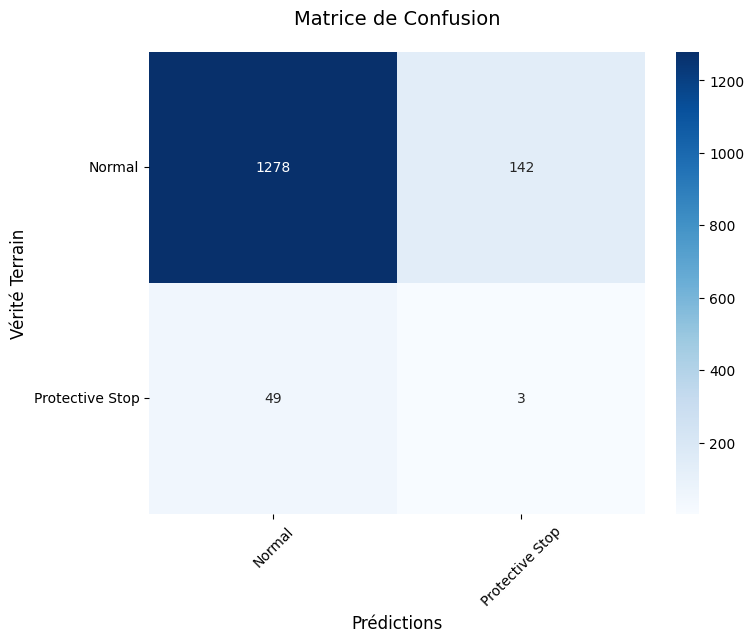

Accuracy: 0.8702445652173914
Recall: 0.057692307692307696
F1-Score: 0.030456852791878174

Rapport de classification :
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      1420
           1       0.02      0.06      0.03        52

    accuracy                           0.87      1472
   macro avg       0.49      0.48      0.48      1472
weighted avg       0.93      0.87      0.90      1472



In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, f1_score

# Prédictions avec le modèle sur les données de test
y_pred = model_cnn.predict(test_generator)

# Conversion des prédictions en classes binaires
y_pred_classes = (y_pred > 0.5).astype(int)

# Afficher les valeurs uniques dans les prédictions
print("Valeurs uniques dans y_pred_classes:", np.unique(y_pred_classes))

# Collecter les vraies étiquettes (y_true) à partir du générateur de test
y_true = []
for i in range(len(test_generator)):
    _, y_batch = test_generator[i]
    y_true.extend(y_batch)

y_true = np.array(y_true)

# Afficher les valeurs uniques dans les vraies étiquettes
print("Valeurs uniques dans y_true:", np.unique(y_true))

# Conversion des vraies étiquettes en classes binaires
y_true = (y_true > 0.5).astype(int)

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualisation graphique de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Normal', 'Protective Stop'],
            yticklabels=['Normal', 'Protective Stop'])

plt.title('Matrice de Confusion', fontsize=14, pad=20)
plt.xlabel('Prédictions', fontsize=12)
plt.ylabel('Vérité Terrain', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Calculer l'accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy: {accuracy}")

# Calculer le recall
recall = recall_score(y_true, y_pred_classes)
print(f"Recall: {recall}")

# Calculer le F1-score
f1 = f1_score(y_true, y_pred_classes)
print(f"F1-Score: {f1}")

# Afficher le rapport de classification
print("\nRapport de classification :\n", classification_report(y_true, y_pred_classes))

Enregistrement du modèle

In [ ]:

import pickle
# Sauvegarde du modèle au format .h5
model_cnn.save('model_cnn.h5')
print("Le modèle a été sauvegardé au format .h5")
# Sauvegarde des poids du modèle au format .pkl
with open('model_cnn.pkl', 'wb') as f:
    pickle.dump(model_cnn.get_weights(), f)
print("Les poids du modèle ont été sauvegardés au format .pkl")

Le modèle a été sauvegardé au format .h5
Les poids du modèle ont été sauvegardés au format .pkl


In [ ]:
from tensorflow.keras.layers import GRU, Bidirectional, Attention
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense


train_generator = TimeseriesGenerator(
    X_train,
    y_train.to_numpy(),
    length=10,
    batch_size=32
)

test_generator = TimeseriesGenerator(
    X_test,
    y_test.to_numpy(),
    length=10,
    batch_size=32
)

inputs = tf.keras.Input(shape=(10, X_scaled.shape[1]))
gru_out = Bidirectional(GRU(32, return_sequences=True))(inputs)
attention = Attention()([gru_out, gru_out])
x = tf.keras.layers.GlobalAveragePooling1D()(attention)
outputs = Dense(1, activation='sigmoid')(x)

model_gru = Model(inputs, outputs)

model_gru.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

history_gru = model_gru.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)]
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8821 - loss: 0.3588 - precision_2: 0.0343 - recall_2: 0.0617 - val_accuracy: 0.9647 - val_loss: 0.1545 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 2/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9626 - loss: 0.1611 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_accuracy: 0.9647 - val_loss: 0.1552 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 3/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9614 - loss: 0.1620 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_accuracy: 0.9647 - val_loss: 0.1563 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 4/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9636 - loss: 0.1528 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_accuracy: 0.9647 - val_loss: 0.1589 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Valeurs uniques dans y_pred_classes: [0]
Valeurs uniques dans y_true: [0. 1.]


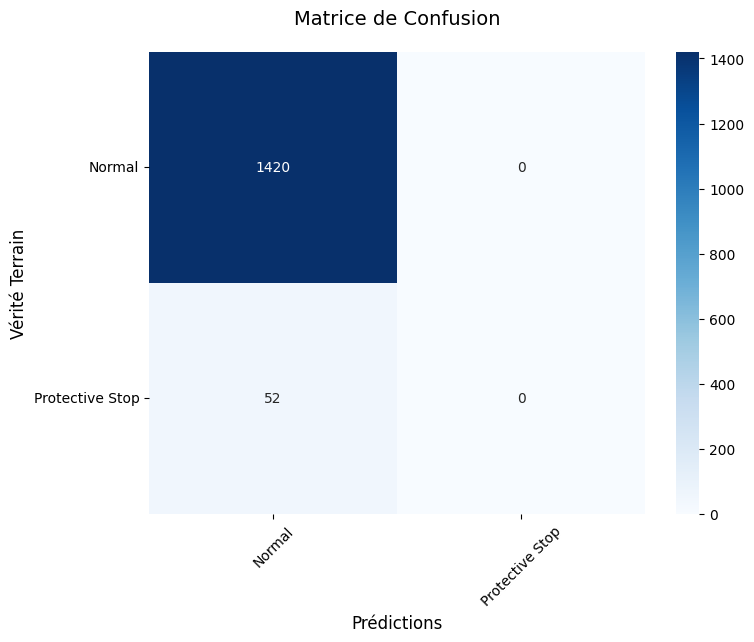

Accuracy: 0.9646739130434783
Recall: 0.0
F1-Score: 0.0

Rapport de classification :
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1420
           1       0.00      0.00      0.00        52

    accuracy                           0.96      1472
   macro avg       0.48      0.50      0.49      1472
weighted avg       0.93      0.96      0.95      1472



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, f1_score

# Prédictions avec le modèle sur les données de test
y_pred = model_gru.predict(test_generator)

# Conversion des prédictions en classes binaires
y_pred_classes = (y_pred > 0.5).astype(int)

# Afficher les valeurs uniques dans les prédictions
print("Valeurs uniques dans y_pred_classes:", np.unique(y_pred_classes))

# Collecter les vraies étiquettes (y_true) à partir du générateur de test
y_true = []
for i in range(len(test_generator)):
    _, y_batch = test_generator[i]
    y_true.extend(y_batch)

y_true = np.array(y_true)

# Afficher les valeurs uniques dans les vraies étiquettes
print("Valeurs uniques dans y_true:", np.unique(y_true))

# Conversion des vraies étiquettes en classes binaires
y_true = (y_true > 0.5).astype(int)

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualisation graphique de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Normal', 'Protective Stop'],
            yticklabels=['Normal', 'Protective Stop'])

plt.title('Matrice de Confusion', fontsize=14, pad=20)
plt.xlabel('Prédictions', fontsize=12)
plt.ylabel('Vérité Terrain', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Calculer l'accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy: {accuracy}")

# Calculer le recall
recall = recall_score(y_true, y_pred_classes)
print(f"Recall: {recall}")

# Calculer le F1-score
f1 = f1_score(y_true, y_pred_classes)
print(f"F1-Score: {f1}")

# Afficher le rapport de classification
print("\nRapport de classification :\n", classification_report(y_true, y_pred_classes))

In [ ]:
import pickle

# Sauvegarder les poids du modèle en format Pickle (.pkl)
with open('model_gru_weights.pkl', 'wb') as f:
    pickle.dump(model_gru.get_weights(), f)

print("Poids du modèle enregistrés en 'model_gru_weights.pkl'")

Poids du modèle enregistrés en 'model_gru_weights.pkl'
